In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)
import seaborn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
import xgboost as xgb
import math
from sklearn.grid_search import GridSearchCV

In [44]:
TRAINING_DATA_FILE = './../data/train.csv'
TEST_DATA_FILE = './../data/test.csv'

df_train = pd.DataFrame.from_csv(TRAINING_DATA_FILE)

df_test = pd.DataFrame.from_csv(TEST_DATA_FILE)

In [45]:
df_train.head()

,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight,SignFacing (Target)
Id,,,,,,
2c9180975a056a64015a1e0a52e57021,Rear,195,1.02,46,45,Rear
2c9180975a056a64015a1e17b32171e4,Rear,203,1.09,59,54,Rear
2c9180975a056a64015a1de4deb16bd5,Front,26,0.96,104,108,Front
2c9180975a056a64015a1de4deb16bdd,Rear,199,0.81,38,47,Rear
2c9180975a056a64015a1de4deb16bd6,Rear,208,0.93,54,58,Rear


In [ ]:
# def print_full(x):
#     pd.set_option('display.max_rows', len(x))
#     print(x)
#     pd.reset_option('display.max_rows')

# nans = df_train.shape[0] - df_train.dropna().shape[0]
# print ("%d rows have missing values in the train data" %nans)
# nand = df_test.shape[0] - df_test.dropna().shape[0]
# print ("%d rows have missing values in the test data" %nand)

# pd.crosstab(df_train.DetectedCamera, df_train['SignFacing (Target)'], margins=True)

In [ ]:
def plot_dataframe(df_train, y):
    df_train['SignFacing (Target) Encoded'] = y
    fig = plt.figure(figsize=(18, 80), dpi=80)
    colors = ['b', 'g', 'r', 'y']
    labels = ['Front Facing', 'Left Facing', 'Rear Facing', 'Right Facing']
    columns = 2
    df_train_bkp = df_train
    rows = int(len(df_train.columns)/columns) + 1
    for idx, _ in enumerate(df_train.columns.tolist()):
        subplot = fig.add_subplot(rows, columns, idx+1)
        fr = subplot.scatter(
            df_train[_][df_train['SignFacing (Target) Encoded']==0], 
            df_train['SignFacing (Target) Encoded'][df_train['SignFacing (Target) Encoded']==0], 
            color=colors[0],
            marker='x'
        )
        le = subplot.scatter(
            df_train[_][df_train['SignFacing (Target) Encoded']==1], 
            df_train['SignFacing (Target) Encoded'][df_train['SignFacing (Target) Encoded']==1], 
            color=colors[1],
            marker='x'
        )
        re = subplot.scatter(
            df_train[_][df_train['SignFacing (Target) Encoded']==2], 
            df_train['SignFacing (Target) Encoded'][df_train['SignFacing (Target) Encoded']==2], 
            color=colors[2],
            marker='x'
        )
        ri = subplot.scatter(
            df_train[_][df_train['SignFacing (Target) Encoded']==3], 
            df_train['SignFacing (Target) Encoded'][df_train['SignFacing (Target) Encoded']==3], 
            color=colors[3],
            marker='x'
        )
        subplot.legend((fr, le, re, ri),
                  labels,
                  scatterpoints=1)
        subplot.set_xlabel(_)
        subplot.set_ylabel('Sign Facing')
        subplot.title.set_text(_ + ' vs Sign Facing')
    plt.show()
plot_dataframe(X, y)

In [ ]:
import math
for elem in df_train.columns.tolist():
    print(elem)
    try:
        df_train[elem].plot.hist()
    except:
        continue

In [46]:
for x in df_train.columns:
    if df_train[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df_train[x].values))
        df_train[x + ' Encoded'] = lbl.transform(list(df_train[x].values))

In [47]:
df_train['camera_angle'] = 360 - df_train['DetectedCamera Encoded'] * 90
df_train.camera_angle[df_train['camera_angle'] == 360] = 0
df_train['angle_of_sign'] = pd.Series((df_train.AngleOfSign - df_train.camera_angle)).astype('float')
# df_train['aspect_ratio_exp'] = np.power(10, df_train['SignAspectRatio'])
# df_train['cos_AngleOfSign'] = df_train.AngleOfSign.apply((lambda x: math.cos(x * math.pi/180)))
# df_train['sin_AngleOfSign'] = df_train.AngleOfSign.apply((lambda x: math.sin(x * math.pi/180)))
# df_train['cos_angle'] = df_train.angle_of_sign.apply(lambda x: math.cos(x * math.pi/180))
# df_train['sin_angle'] = df_train.angle_of_sign.apply(lambda x: math.sin(x * math.pi/180))
# df_train['cos_SignWidth'] = df_train.cos_angle * df_train.SignWidth
# df_train['sin_SignWidth'] = df_train.sin_angle * df_train.SignWidth
# df_train['cos_AspectRatio'] = df_train.cos_SignWidth * df_train.cos_angle
# df_train['sin_AspectRatio'] = df_train.sin_SignWidth * df_train.cos_angle
# df_train['sign_area'] = df_train.SignHeight * df_train.SignWidth
# df_train['cos_sign_area'] = df_train.SignHeight * df_train.cos_SignWidth
# df_train['sin_sign_area'] = df_train.SignHeight * df_train.sin_SignWidth
df_train['sign_impossible'] = df_train['DetectedCamera Encoded'].apply(lambda x : int((x+2)%4))

y = df_train['SignFacing (Target) Encoded']

/Users/shams/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [48]:
df_train.head()

,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight,SignFacing (Target),DetectedCamera Encoded,SignFacing (Target) Encoded,camera_angle,angle_of_sign,aspect_ratio_exp,sign_impossible
Id,,,,,,,,,,,,
2c9180975a056a64015a1e0a52e57021,Rear,195,1.02,46,45,Rear,2,2,180,15.0,10.471285,0
2c9180975a056a64015a1e17b32171e4,Rear,203,1.09,59,54,Rear,2,2,180,23.0,12.302688,0
2c9180975a056a64015a1de4deb16bd5,Front,26,0.96,104,108,Front,0,0,0,26.0,9.120108,2
2c9180975a056a64015a1de4deb16bdd,Rear,199,0.81,38,47,Rear,2,2,180,19.0,6.456542,0
2c9180975a056a64015a1de4deb16bd6,Rear,208,0.93,54,58,Rear,2,2,180,28.0,8.511380,0


In [49]:
# pd.set_option('display.max_columns', 100)
# print(df_train.head())
# pd.reset_option('display.max_rows')

In [50]:
X = df_train.drop(['DetectedCamera', 
                   'SignFacing (Target)', 
                   'SignFacing (Target) Encoded', 
#                    'camera_angle',
#                    'SignWidth',
#                    'sin_AspectRatio',
#                    'cos_sign_area',
#                    'sign_impossible', 
#                    'DetectedCamera Encoded', 
#                    'sin_angle',
#                    'angle_of_sign',
#                    'sin_AspectRatio',
#                    'cos_angle',
#                    'sin_AngleOfSign',
#                    'SignWidth',
                  ], axis=1, inplace=False)

# df_train.corr()

# X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)
X_train, y_train = X, y

In [51]:
df_train_front = df_train.loc[df_train['DetectedCamera Encoded'] == 0]
y_front = df_train_front['SignFacing (Target) Encoded']
X_front = df_train_front.drop(['DetectedCamera', 
                   'SignFacing (Target)', 
                   'SignFacing (Target) Encoded', 
                ], axis=1, inplace=False)
df_train_left = df_train.loc[df_train['DetectedCamera Encoded'] == 1]
y_left = df_train_left['SignFacing (Target) Encoded']
X_left = df_train_left.drop(['DetectedCamera', 
                   'SignFacing (Target)', 
                   'SignFacing (Target) Encoded', 
                ], axis=1, inplace=False)
df_train_rear = df_train.loc[df_train['DetectedCamera Encoded'] == 2]
y_rear = df_train_rear['SignFacing (Target) Encoded']
X_rear = df_train_rear.drop(['DetectedCamera', 
                   'SignFacing (Target)', 
                   'SignFacing (Target) Encoded', 
                ], axis=1, inplace=False)
df_train_right = df_train.loc[df_train['DetectedCamera Encoded'] == 3]
y_right = df_train_right['SignFacing (Target) Encoded']
X_right = df_train_right.drop(['DetectedCamera', 
                   'SignFacing (Target)', 
                   'SignFacing (Target) Encoded', 
                ], axis=1, inplace=False)

In [15]:
# X_train_front, X_valid_front,y_train_front,y_valid_front = train_test_split(X_front,y_front,test_size=0.3,random_state=1,stratify=y_front)
# X_train_left, X_valid_left,y_train_left,y_valid_left = train_test_split(X_left,y_left,test_size=0.3,random_state=1,stratify=y_left)
# X_train_rear, X_valid_rear,y_train_rear,y_valid_rear = train_test_split(X_rear,y_rear,test_size=0.3,random_state=1,stratify=y_rear)
# X_train_right, X_valid_right,y_train_right,y_valid_right = train_test_split(X_right,y_right,test_size=0.3,random_state=1,stratify=y_right)

In [52]:
X_train_front, y_train_front = X_front,y_front
X_train_left,y_train_left = X_left,y_left
X_train_rear,y_train_rear = X_rear,y_rear
X_train_right,y_train_right = X_right,y_right

In [ ]:
# clf = RandomForestClassifier(
#     n_estimators = 1200, 
#     max_depth = 9, 
#     max_features=0.2, 
#     min_samples_leaf=100, 
#     random_state=42,
#     oob_score=True
# )
# clf.fit(X_train,y_train)

# print ('The accuracy of RandomForrest is {}'.format(accuracy_score(clf.predict(X_valid), y_valid)))

In [53]:
# import xgboost as xgb
# Set our parameters for xgboost
params = {}
params['objective'] = 'multi:softprob'
params['eval_metric'] = 'mlogloss'
params['eta'] = 0.01
params['num_class'] = 4
params['n_estimators'] = 10000
params['max_depth'] = 4 # or 5
params['min_child_weight'] = 4 # or 1
params['gamma'] = 0.4 # or 0
params['subsample'] = 0.8
params['colsample_bytree'] = 0.75 # or 0.8
params['nthread'] = 4
params['scale_pos_weight'] = 1
params['seed'] = 1
# params['reg_alpha'] = 0.05


# d_train = xgb.DMatrix(X_train, label=y_train)
# d_valid = xgb.DMatrix(X_valid, label=y_valid)
d_train = xgb.DMatrix(X_train, label=y_train)
# watchlist = [(d_train, 'train'), (d_valid, 'valid')]
watchlist = [(d_train, 'train')]

bst = xgb.train(params, d_train, 1110, watchlist, early_stopping_rounds=50, verbose_eval=50)

# prediction = np.argmax(bst.predict(d_valid), axis=1)
# acc =  accuracy_score(np.array(y_valid),prediction)
# print ('The accuracy of XGBoost is {}'.format(acc))

[0]	train-mlogloss:1.36794
Will train until train-mlogloss hasn't improved in 50 rounds.
[50]	train-mlogloss:0.773245
[100]	train-mlogloss:0.484606
[150]	train-mlogloss:0.325848
[200]	train-mlogloss:0.234218
[250]	train-mlogloss:0.17986
[300]	train-mlogloss:0.14747
[350]	train-mlogloss:0.127918
[400]	train-mlogloss:0.115899
[450]	train-mlogloss:0.108566
[500]	train-mlogloss:0.103874
[550]	train-mlogloss:0.100801
[600]	train-mlogloss:0.098595
[650]	train-mlogloss:0.097011
[700]	train-mlogloss:0.095826
[750]	train-mlogloss:0.094834
[800]	train-mlogloss:0.09401
[850]	train-mlogloss:0.09326
[900]	train-mlogloss:0.09259
[950]	train-mlogloss:0.091975
[1000]	train-mlogloss:0.091412
[1050]	train-mlogloss:0.090839
[1100]	train-mlogloss:0.090258


In [54]:
# FRONT
# import xgboost as xgb
# Set our parameters for xgboost

params = {}
params['objective'] = 'multi:softprob'
params['eval_metric'] = 'mlogloss'
params['eta'] = 0.01
params['num_class'] = 4
params['n_estimators'] = 10000
params['max_depth'] = 4 # or 5
params['min_child_weight'] = 4 # or 1
params['gamma'] = 0.4 # or 0
params['subsample'] = 0.8
params['colsample_bytree'] = 0.75 # or 0.8
params['nthread'] = 4
params['scale_pos_weight'] = 1
params['seed'] = 1
# params['reg_alpha'] = 0.05


# d_train = xgb.DMatrix(X_train_front, label=y_train_front)
# d_valid = xgb.DMatrix(X_valid_front, label=y_valid_front)
d_train = xgb.DMatrix(X_train_front, label=y_train_front)

# watchlist = [(d_train, 'train'), (d_valid, 'valid')]
watchlist = [(d_train, 'train')]

bst_front = xgb.train(params, d_train, 810, watchlist, early_stopping_rounds=50, verbose_eval=50)

# prediction = np.argmax(bst_front.predict(d_valid), axis=1)
# acc =  accuracy_score(np.array(y_valid_front),prediction)
# print ('The accuracy of XGBoost is {}'.format(acc))

[0]	train-mlogloss:1.36691
Will train until train-mlogloss hasn't improved in 50 rounds.
[50]	train-mlogloss:0.740177
[100]	train-mlogloss:0.437699
[150]	train-mlogloss:0.271342
[200]	train-mlogloss:0.175499
[250]	train-mlogloss:0.118908
[300]	train-mlogloss:0.085066
[350]	train-mlogloss:0.064413
[400]	train-mlogloss:0.051733
[450]	train-mlogloss:0.043888
[500]	train-mlogloss:0.038928
[550]	train-mlogloss:0.035757
[600]	train-mlogloss:0.033597
[650]	train-mlogloss:0.032099
[700]	train-mlogloss:0.030988
[750]	train-mlogloss:0.030104
[800]	train-mlogloss:0.029361


In [55]:
# LEFT
# import xgboost as xgb
# Set our parameters for xgboost

params = {}
params['objective'] = 'multi:softprob'
params['eval_metric'] = 'mlogloss'
params['eta'] = 0.01
params['num_class'] = 4
params['n_estimators'] = 10000
params['max_depth'] = 4 # or 5
params['min_child_weight'] = 4 # or 1
params['gamma'] = 0.4 # or 0
params['subsample'] = 0.8
params['colsample_bytree'] = 0.75 # or 0.8
params['nthread'] = 4
params['scale_pos_weight'] = 1
params['seed'] = 1
# params['reg_alpha'] = 0.05


# d_train = xgb.DMatrix(X_train_left, label=y_train_left)
# d_valid = xgb.DMatrix(X_valid_left, label=y_valid_left)
d_train = xgb.DMatrix(X_train_left, label=y_train_left)
# watchlist = [(d_train, 'train'), (d_valid, 'valid')]
watchlist = [(d_train, 'train')]

bst_left = xgb.train(params, d_train, 790, watchlist, early_stopping_rounds=50, verbose_eval=50)

# prediction = np.argmax(bst_left.predict(d_valid), axis=1)
# acc =  accuracy_score(np.array(y_valid_left),prediction)
# print ('The accuracy of XGBoost is {}'.format(acc))

[0]	train-mlogloss:1.37042
Will train until train-mlogloss hasn't improved in 50 rounds.
[50]	train-mlogloss:0.812756
[100]	train-mlogloss:0.539591
[150]	train-mlogloss:0.390218
[200]	train-mlogloss:0.302804
[250]	train-mlogloss:0.251241
[300]	train-mlogloss:0.220194
[350]	train-mlogloss:0.201086
[400]	train-mlogloss:0.189066
[450]	train-mlogloss:0.181176
[500]	train-mlogloss:0.175735
[550]	train-mlogloss:0.171844
[600]	train-mlogloss:0.168875
[650]	train-mlogloss:0.166534
[700]	train-mlogloss:0.164501
[750]	train-mlogloss:0.162683


In [56]:
# REAR
# import xgboost as xgb
# Set our parameters for xgboost

params = {}
params['objective'] = 'multi:softprob'
params['eval_metric'] = 'mlogloss'
params['eta'] = 0.01
params['num_class'] = 4
params['n_estimators'] = 10000
params['max_depth'] = 4 # or 5
params['min_child_weight'] = 4 # or 1
params['gamma'] = 0.4 # or 0
params['subsample'] = 0.8
params['colsample_bytree'] = 0.75 # or 0.8
params['nthread'] = 4
params['scale_pos_weight'] = 1
params['seed'] = 1
# params['reg_alpha'] = 0.05


# d_train = xgb.DMatrix(X_train_rear, label=y_train_rear)
# d_valid = xgb.DMatrix(X_valid_rear, label=y_valid_rear)
d_train = xgb.DMatrix(X_train_rear, label=y_train_rear)
# watchlist = [(d_train, 'train'), (d_valid, 'valid')]
watchlist = [(d_train, 'train')]
bst_rear = xgb.train(params, d_train, 830, watchlist, early_stopping_rounds=50, verbose_eval=50)

# prediction = np.argmax(bst_rear.predict(d_valid), axis=1)
# acc =  accuracy_score(np.array(y_valid_rear),prediction)
# print ('The accuracy of XGBoost is {}'.format(acc))

[0]	train-mlogloss:1.36684
Will train until train-mlogloss hasn't improved in 50 rounds.
[50]	train-mlogloss:0.738746
[100]	train-mlogloss:0.435905
[150]	train-mlogloss:0.269593
[200]	train-mlogloss:0.173848
[250]	train-mlogloss:0.117454
[300]	train-mlogloss:0.083864
[350]	train-mlogloss:0.063636
[400]	train-mlogloss:0.051362
[450]	train-mlogloss:0.043716
[500]	train-mlogloss:0.038844
[550]	train-mlogloss:0.035595
[600]	train-mlogloss:0.033323
[650]	train-mlogloss:0.031648
[700]	train-mlogloss:0.030326
[750]	train-mlogloss:0.029228
[800]	train-mlogloss:0.028312


In [57]:
# RIGHT
# import xgboost as xgb
# Set our parameters for xgboost

params = {}
params['objective'] = 'multi:softprob'
params['eval_metric'] = 'mlogloss'
params['eta'] = 0.01
params['num_class'] = 4
params['n_estimators'] = 10000
params['max_depth'] = 4 # or 5
params['min_child_weight'] = 4 # or 1
params['gamma'] = 0.4 # or 0
params['subsample'] = 0.8
params['colsample_bytree'] = 0.75 # or 0.8
params['nthread'] = 4
params['scale_pos_weight'] = 1
params['seed'] = 1
# params['reg_alpha'] = 0.05


# d_train = xgb.DMatrix(X_train_right, label=y_train_right)
# d_valid = xgb.DMatrix(X_valid_right, label=y_valid_right)
d_train = xgb.DMatrix(X_train_right, label=y_train_right)
# watchlist = [(d_train, 'train'), (d_valid, 'valid')]
watchlist = [(d_train, 'train')]
bst_right = xgb.train(params, d_train, 800, watchlist, early_stopping_rounds=50, verbose_eval=50)

# prediction = np.argmax(bst_right.predict(d_valid), axis=1)
# acc =  accuracy_score(np.array(y_valid_right),prediction)
# print ('The accuracy of XGBoost is {}'.format(acc))

[0]	train-mlogloss:1.3683
Will train until train-mlogloss hasn't improved in 50 rounds.
[50]	train-mlogloss:0.78477
[100]	train-mlogloss:0.500271
[150]	train-mlogloss:0.342356
[200]	train-mlogloss:0.250896
[250]	train-mlogloss:0.196773
[300]	train-mlogloss:0.163886
[350]	train-mlogloss:0.143665
[400]	train-mlogloss:0.131026
[450]	train-mlogloss:0.122942
[500]	train-mlogloss:0.117535
[550]	train-mlogloss:0.113868
[600]	train-mlogloss:0.111125
[650]	train-mlogloss:0.108869
[700]	train-mlogloss:0.107112
[750]	train-mlogloss:0.105609


In [ ]:
# param_test_1 = {
#     'max_depth': list(range(3, 10, 2)),
#     'min_child_weight': list(range(1, 6, 2))
# }
# gsearch_1 = GridSearchCV(
#     estimator=XGBClassifier(
#         learning_rate=0.1,
#         n_estimators=140,
#         max_depth=5,
#         min_child_weight=1,
#         gamma=0,
#         subsample=0.8,
#         colsample_bytree=0.8,
#         objective='binary:logistic',
#         nthread=4,
#         scale_pos_weight=1,
#         seed=27
#     ),
#     param_grid=param_test_1,
#     scoring='roc_auc',
#     n_jobs=4,
#     iid=False,
#     cv=5
# )
# gsearch_1.fit(X_train, y_train)

# confusion_matrix(np.array(y_valid),prediction)

# from sklearn.neural_network import MLPClassifier

# X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.0001,random_state=1,stratify=y)
# mlp = MLPClassifier(
#     hidden_layer_sizes=(50,),
#     max_iter=1000,
#     warm_start=True,
#     verbose=True,
#     validation_fraction=0.3
# )
# mlp.fit(X_train, y_train)

# accuracy_score(mlp.predict(X_valid), y_valid)

# xyz = mlp.predict_proba(X_train)
# zyx = mlp.predict_proba(X_valid)
# xyz = mlp.predict_proba(X_test)

# prediction = clf.predict(X_valid)
# acc =  accuracy_score(np.array(y_valid),prediction)
# print ('The accuracy of Random Forest is {}'.format(acc))

In [58]:
for x in df_test.columns:
    if df_test[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df_test[x].values))
        df_test[x + ' Encoded'] = lbl.transform(list(df_test[x].values))

df_test['camera_angle'] = 360 - df_test['DetectedCamera Encoded'] * 90
df_test.camera_angle[df_test['camera_angle'] == 360] = 0
df_test['angle_of_sign'] = pd.Series((df_test.AngleOfSign- df_test.camera_angle)).astype('float')
df_test['aspect_ratio_exp'] = np.power(10, df_test['SignAspectRatio'])
# df_test['cos_AngleOfSign'] = df_test.AngleOfSign.apply((lambda x: math.cos(x * math.pi/180)))
# df_test['sin_AngleOfSign'] = df_test.AngleOfSign.apply((lambda x: math.sin(x * math.pi/180)))
# df_test['cos_angle'] = df_test.angle_of_sign.apply(lambda x: math.cos(x * math.pi/180))
# df_test['sin_angle'] = df_test.angle_of_sign.apply(lambda x: math.sin(x * math.pi/180))
# df_test['cos_SignWidth'] = df_test.cos_angle * df_test.SignWidth
# df_test['sin_SignWidth'] = df_test.sin_angle * df_test.SignWidth
# df_test['cos_AspectRatio'] = df_test.cos_SignWidth * df_test.cos_angle
# df_test['sin_AspectRatio'] = df_test.sin_SignWidth * df_test.cos_angle
# df_test['sign_area'] = df_test.SignHeight * df_test.SignWidth
# df_test['cos_sign_area'] = df_test.SignHeight * df_test.cos_SignWidth
# df_test['sin_sign_area'] = df_test.SignHeight * df_test.sin_SignWidth
df_test['sign_impossible'] = df_test['DetectedCamera Encoded'].apply(lambda x : int((x+2)%4))
X_test = df_test.drop(['DetectedCamera', 
#                        'camera_angle', 
#                        'DetectedCamera Encoded',
#                        'camera_angle',
#                        'SignWidth',
#                        'sin_AspectRatio',
#                        'cos_sign_area',
#                        'sign_impossible', 
#                        'DetectedCamera Encoded', 
#                        'sin_angle',
#                        'angle_of_sign',
#                        'sin_AspectRatio',
#                        'cos_angle',
#                        'sin_AngleOfSign',
#                        'SignWidth',
                      ], axis=1, inplace=False)

/Users/shams/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [59]:
X_test_front = X_test.loc[df_test['DetectedCamera Encoded'] == 0]
X_test_left = X_test.loc[df_test['DetectedCamera Encoded'] == 1]
X_test_rear = X_test.loc[df_test['DetectedCamera Encoded'] == 2]
X_test_right = X_test.loc[df_test['DetectedCamera Encoded'] == 3]

In [60]:
d_test = xgb.DMatrix(X_test)
p_test = bst.predict(d_test)

In [61]:
d_test = xgb.DMatrix(X_test_front)
p_test_front = bst_front.predict(d_test)
d_test = xgb.DMatrix(X_test_left)
p_test_left = bst_left.predict(d_test)
d_test = xgb.DMatrix(X_test_rear)
p_test_rear = bst_rear.predict(d_test)
d_test = xgb.DMatrix(X_test_right)
p_test_right = bst_right.predict(d_test)

In [62]:
z = np.array(X_test.index.tolist())
z = z.reshape(z.shape[0], 1)
z.shape

(31485, 1)

In [63]:
z_front = np.array(X_test_front.index.tolist())
z_front = z_front.reshape(z_front.shape[0], 1)
z_left = np.array(X_test_left.index.tolist())
z_left = z_left.reshape(z_left.shape[0], 1)
z_rear = np.array(X_test_rear.index.tolist())
z_rear = z_rear.reshape(z_rear.shape[0], 1)
z_right = np.array(X_test_right.index.tolist())
z_right = z_right.reshape(z_right.shape[0], 1)

In [ ]:
# test_scores = clf.predict_proba(X_test)

In [64]:
z_front = np.concatenate((z_front, p_test_front), 1)
z_left = np.concatenate((z_left, p_test_left), 1)
z_rear = np.concatenate((z_rear, p_test_rear), 1)
z_right = np.concatenate((z_right, p_test_right), 1)

In [65]:
# z2 = np.concatenate((z, xyz), 1)
# z1 = np.concatenate((z, test_scores), 1)
z = np.concatenate((z, p_test), 1)

In [ ]:
p_test_rear.shape


In [ ]:
z_front[:,1] = z_front[:, 1].astype(float) + z_front[:, 3].astype(float)
z_front[:, 3] = 0

In [ ]:
z_front

In [ ]:
z_left[:,2] = z_left[:, 2].astype(float) + z_left[:, 4].astype(float)
z_left[:, 4] = 0
z_rear[:,3] = z_rear[:, 3].astype(float) + z_rear[:, 1].astype(float)
z_rear[:, 1] = 0
z_right[:,4] = z_right[:, 4].astype(float) + z_right[:, 2].astype(float)
z_right[:, 2] = 0

In [68]:
z = np.concatenate((z_front, z_left, z_rear, z_right), 0)

In [69]:
df = pd.DataFrame(z, columns=['Id', 'Front', 'Left', 'Rear', 'Right'])
# df1 = pd.DataFrame(z1, columns=['Id', 'Front', 'Left', 'Rear', 'Right'])
# df2 = pd.DataFrame(z2, columns=['Id', 'Front', 'Left', 'Rear', 'Right'])

In [70]:
df.to_csv('xgb_0.96_new.csv', index=None)
# df1.to_csv('rdf_0.96.csv')
# df2.to_csv('mlp_0.96.csv')

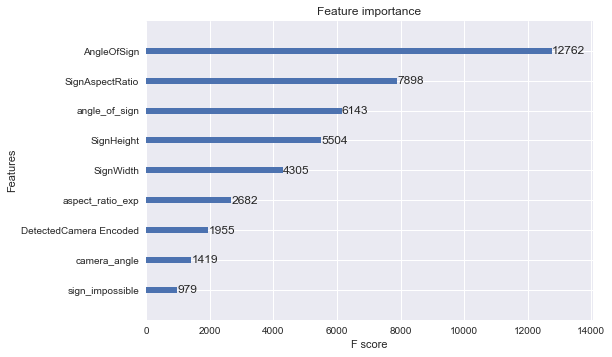

In [71]:
import matplotlib.pyplot as plt 
xgb.plot_importance(bst)
# plt.show()

In [ ]:
plt.show()